In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class MESAprofile:
    
    def __init__(self,header,df):
        
        self.header = header
        self.df = df 
        
        df["X"]=df["h1"]
        df["Y"]=df["he3"]+df["he4"]
        df["Z"]=1-df["X"]-df["Y"]
        
        for key in self.header:
            setattr(self, key, self.header[key])
        
    @classmethod
    def load(cls,file):
        fo=open(file,"r")
        fo.readline()
        header=fo.readline().split()
        header_values=fo.readline().split()
        header_dict={}
        for name,value in zip(header,header_values):
            try:
                v=float(value)
            except:
                v=str(value)
            header_dict[name]=v
        fo.readline()
        fo.close()        
        return cls(header=header_dict, df=pd.read_csv(file,sep="\s+",skiprows=5))
    
    def to_csv(self,file,columns=None):
        
        if columns is None: columns=list(self.df.columns)
            
        self.df[columns].to_csv(file,index=False)
        

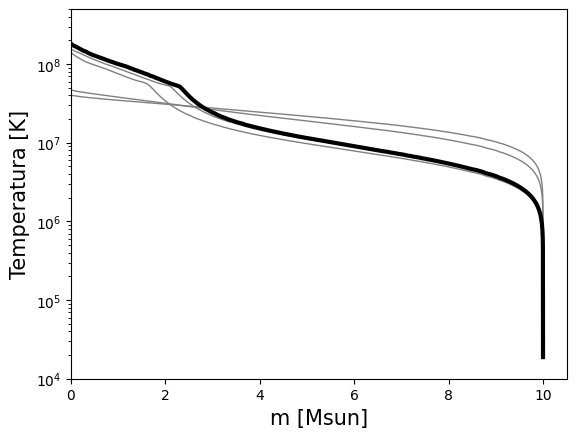

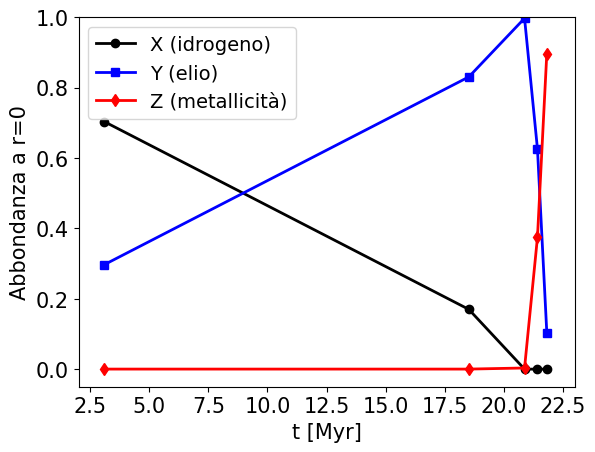

In [160]:
file="MESA-Web_M10_Z00001/profile8.data"
pr1=MESAprofile.load(file)

file="MESA-Web_M10_Z00001/profile10.data"
pr2=MESAprofile.load(file)

file="MESA-Web_M10_Z00001/profile12.data"
pr3=MESAprofile.load(file)

file="MESA-Web_M10_Z00001/profile15.data"
pr4=MESAprofile.load(file)

file="MESA-Web_M10_Z00001/profile17.data"
pr5=MESAprofile.load(file)


#prl=[pr1,pr2,pr3,pr4,pr5]
prl=[pr1,pr2,pr3,pr4,pr5]
k=5

for i,pr in enumerate(prl):
    if len(prl)-1==i: plt.plot(pr.df.mass, 10**pr.df.logT,c="k",lw=3)
    else: plt.plot(pr.df.mass, 10**pr.df.logT,c="gray",lw=1)
plt.yscale("log")
plt.xlabel("m [Msun]",fontsize=15)
plt.ylabel("Temperatura [K]",fontsize=15)
plt.xlim(0,10.5)
plt.ylim(1e4,5e8)
plt.savefig(f"tp{k}.pdf")
plt.show()


agl=[pr.star_age/1e6 for pr in prl]
Xl=[pr.df.X.values[-1] for pr in prl]
Yl=[pr.df.Y.values[-1] for pr in prl]
Zl=[pr.df.Z.values[-1] for pr in prl]

plt.plot(agl,Xl,"-o",color="black",lw=2,label="X (idrogeno)")
plt.plot(agl,Yl,"-s",color="blue",lw=2,label="Y (elio)")
plt.plot(agl,Zl,"-d",color="red",lw=2, label="Z (metallicità)")
plt.xlabel("t [Myr]",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Abbondanza a r=0",fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=14,loc="upper left")
plt.xlim(2,23)
plt.ylim(-0.05,1)
plt.savefig(f"Cp{k}.pdf")
plt.show()

In [31]:
file="MESA-Web_M10_Z00001/profile8.data"
pr1=MESAprofile.load(file)

file="MESA-Web_M10_Z00001/profile10.data"
pr2=MESAprofile.load(file)

file="MESA-Web_M10_Z00001/profile12.data"
pr3=MESAprofile.load(file)

plt.plot(pr1.df.mass, 10**pr1.df.logT)
plt.plot(pr2.df.mass, 10**pr2.df.logT)
plt.plot(pr3.df.mass, 10**pr3.df.logT)
plt.yscale("log")
plt.show()

plt.scatter(pr1.star_age, pr1.df.X.values[-1])
plt.scatter(pr2.star_age, pr2.df.X.values[-1])
plt.scatter(pr3.star_age, pr3.df.X.values[-1])

plt.scatter(pr1.star_age, pr1.df.Y.values[-1])
plt.scatter(pr2.star_age, pr2.df.Y.values[-1])
plt.scatter(pr3.star_age, pr3.df.Y.values[-1])


#plt.xscale("log")
plt.show()

,mass,radius,luminosity,pressure,logRho,logT,energy,entropy,cp,gamma1,...,j_rot,dynamo_log_B_r,dynamo_log_B_phi,log_D_conv,log_D_semi,log_D_ovr,log_D_thrm,X,Y,Z
0,9.999977e+00,4.405243,11327.983002,6.855690e+03,-8.868208,4.453720,2.236861e+13,43.384044,1.423990e+09,1.486760,...,0.0,-99.0,-99.0,-99.000000,-99.0,-99.0,-99.0,0.759700,0.240200,0.000100
1,9.999977e+00,4.405154,11327.983002,7.044431e+03,-8.856557,4.455424,2.235179e+13,43.319430,1.405544e+09,1.487141,...,0.0,-99.0,-99.0,-99.000000,-99.0,-99.0,-99.0,0.759700,0.240200,0.000100
2,9.999977e+00,4.404964,11327.983002,7.238378e+03,-8.845026,4.457171,2.233857e+13,43.256865,1.388262e+09,1.487430,...,0.0,-99.0,-99.0,-99.000000,-99.0,-99.0,-99.0,0.759700,0.240200,0.000100
3,9.999977e+00,4.404872,11327.983002,7.367687e+03,-8.837571,4.458332,2.233179e+13,43.217155,1.377587e+09,1.487568,...,0.0,-99.0,-99.0,-99.000000,-99.0,-99.0,-99.0,0.759700,0.240200,0.000100
4,9.999977e+00,4.404782,11327.983002,7.532630e+03,-8.828317,4.459811,2.232535e+13,43.168748,1.364879e+09,1.487680,...,0.0,-99.0,-99.0,-99.000000,-99.0,-99.0,-99.0,0.759700,0.240200,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,1.250012e-05,0.008907,0.604388,1.068688e+17,1.396520,7.674816,7.226327e+15,12.641793,4.383546e+08,1.547578,...,0.0,-99.0,-99.0,15.526484,-99.0,-99.0,-99.0,0.169742,0.830161,0.000096
486,6.250061e-06,0.007069,0.302296,1.068794e+17,1.396547,7.674830,7.226602e+15,12.641782,4.383626e+08,1.547576,...,0.0,-99.0,-99.0,15.559984,-99.0,-99.0,-99.0,0.169742,0.830161,0.000096
487,3.125031e-06,0.005611,0.151180,1.068860e+17,1.396565,7.674838,7.226775e+15,12.641776,4.383677e+08,1.547575,...,0.0,-99.0,-99.0,15.593465,-99.0,-99.0,-99.0,0.169742,0.830161,0.000096
488,1.562515e-06,0.004453,0.075600,1.068901e+17,1.396576,7.674843,7.226884e+15,12.641771,4.383709e+08,1.547574,...,0.0,-99.0,-99.0,15.626933,-99.0,-99.0,-99.0,0.169742,0.830161,0.000096


In [9]:
pr.df.columns

Index(['mass', 'radius', 'luminosity', 'pressure', 'logRho', 'logT', 'energy',
       'entropy', 'cp', 'gamma1', 'grada', 'mu', 'free_e', 'ye', 'pgas',
       'prad', 'gradr', 'gradT', 'velocity', 'conv_vel', 'opacity', 'eps_nuc',
       'pp', 'cno', 'tri_alfa', 'eps_nuc_neu_total', 'non_nuc_neu', 'eps_grav',
       'h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'ne20', 'mg24', 'si28', 's32',
       'ar36', 'ca40', 'ti44', 'cr48', 'fe52', 'fe54', 'fe56', 'ni56', 'eta',
       'log_omega', 'v_rot', 'j_rot', 'dynamo_log_B_r', 'dynamo_log_B_phi',
       'log_D_conv', 'log_D_semi', 'log_D_ovr', 'log_D_thrm'],
      dtype='object')

import matplotlib.pyplot as plt

file="MESA-Web_M1_Z002/profile3.data"
pr=MESAprofile.load(file)
#pr.to_csv("test.csv")
print(pr.star_age/1e6,pr.star_age/1e9)
plt.plot(pr.df.radius,pr.df.pp)
plt.plot(pr.df.radius,pr.df.eps_grav)

#plt.plot(pr.df.mass,pr.df.tri_alfa)
plt.yscale("log")
print(pr.power_nuc_burn)

In [ ]:
pr.__dict__

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class MESAprofile:
    
    def __init__(self,header,df):
        
        self.header = header
        self.df = df 
        
        for key in self.header:
            setattr(self, key, self.header[key])
        
    @classmethod
    def load(cls,file):
        fo=open(file,"r")
        fo.readline()
        header=fo.readline().split()
        header_values=fo.readline().split()
        header_dict={}
        for name,value in zip(header,header_values):
            try:
                v=float(value)
            except:
                v=str(value)
            header_dict[name]=v
        fo.readline()
        fo.close()        
        return cls(header=header_dict, df=pd.read_csv(file,sep="\s+",skiprows=5))

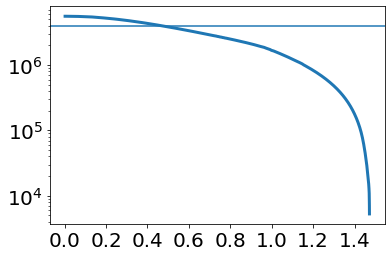

In [28]:
file="MESA-Web_M1_Z00001/profile5.data"
pr1=MESAprofile.load(file)

plt.plot(pr1.df.radius, 10**pr1.df.logT,lw=3)
plt.axhline(4e6)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.yscale("log")

In [6]:
pr1["radius"]

TypeError: 'MESAprofile' object is not subscriptable